## Clusterização de pacientes

### Questão de negocio

Identificar padrões e riscos de desenvolvimento de problemas cardiovasculares

### Entendimento do negocio

Variáveis: gênero, idade, peso e colesterol

Tipo de problema: clusterização

Método: agrupamento k-means

Formato da solução: visualização de dados

### 0.1 - Importar bibliotecas
### 0.2 - Coletar dados
### 1 - Descrição dos dados
### 2 - Visualização de dados
### 3 - Preparação de dados
### 4 - Machine learning

### 0.1 - Importar bibliotecas

In [ ]:
import pandas as pd

### 0.2 - Coletar dados

In [ ]:
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes = pd.read_excel('dados_clientes.xlsx')

In [ ]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding = 'latin-1')

### 1 - Descrição dos dados

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


### 1.1 - Estatística descritiva

In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### 1.2 - Dados ausentes

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


### 1.3 - Substituir NA

In [ ]:
mediana = clientes.peso.median()

In [ ]:
print(f'mediana', round(mediana,2))

mediana 140.0


In [ ]:
clientes.peso.fillna(round(mediana,2), inplace=True)

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [1]:
# estatística descritiva estados

In [ ]:
estados.dropna(subset=['pais'], inplace=True)

In [ ]:
estados.describe()

,id_estado
count,25.000000
mean,13.440000
std,7.942921
min,1.000000
25%,7.000000
50%,13.000000
75%,20.000000
max,27.000000


In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


### 2 - Visualização de dados

In [ ]:
import matplotlib.pyplot as plt

In [2]:
# Distribuição da variável peso

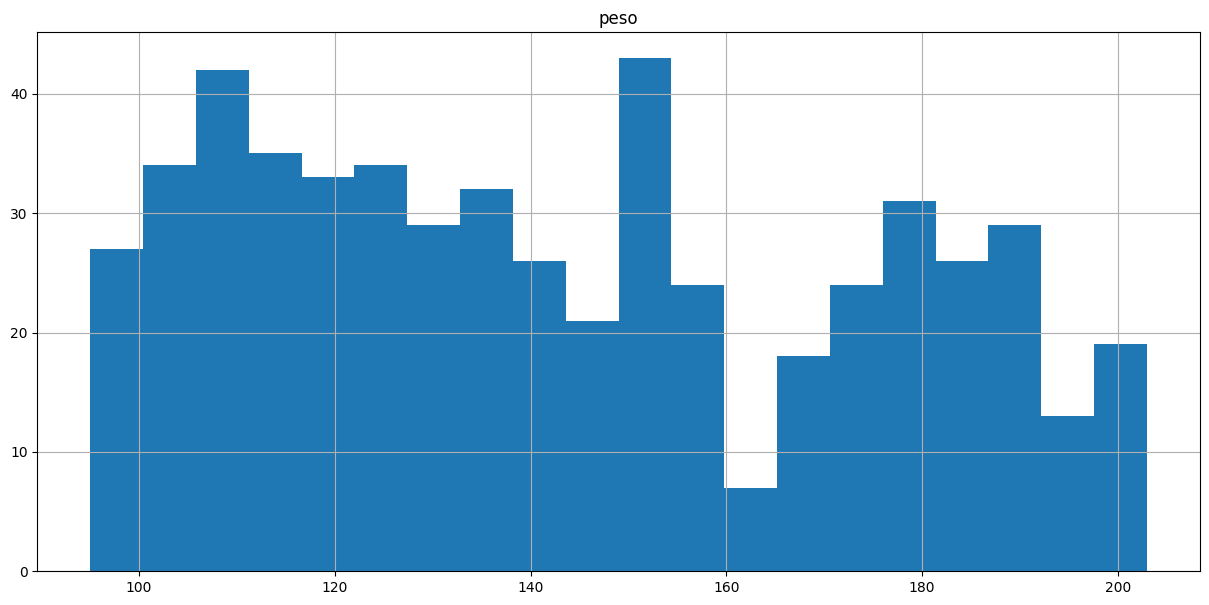

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=20)
plt.show()

### 3 - Preparação de dados

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

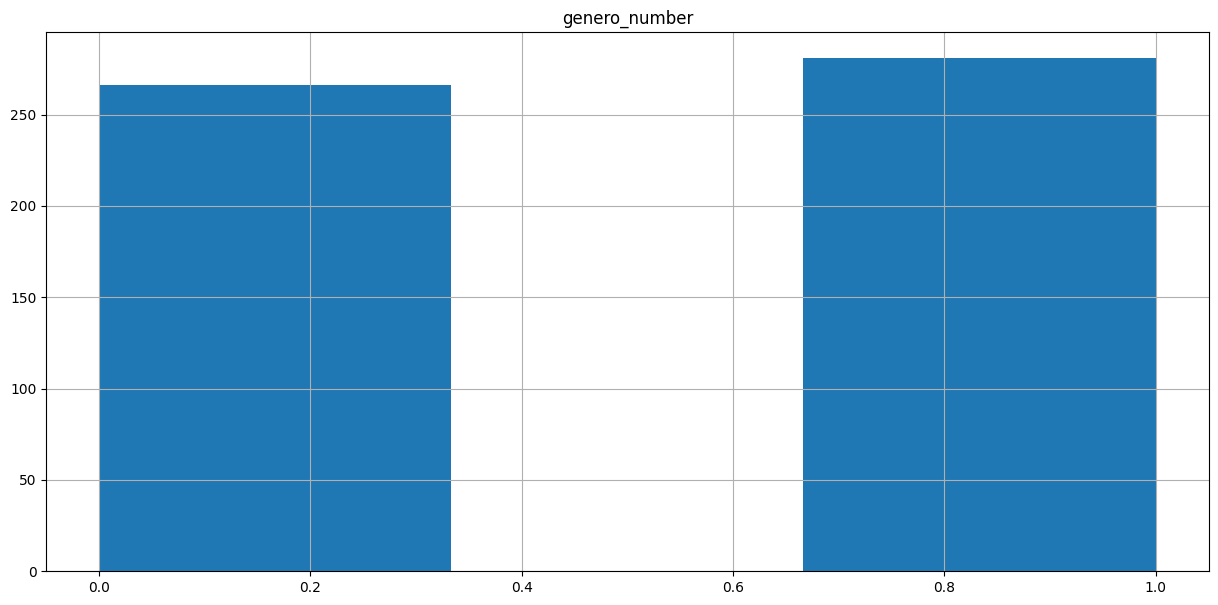

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
84,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
433,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
156,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
497,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
498,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
499,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
500,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


### 3.1 Identificar cotovelo

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

### 4 - Machine learning

In [ ]:
## recalcular o numero de clusters

grafico_wcss = px.line(x = range(1,11), y = wcss_clientes)

fig = go.Figure(grafico_wcss)

fig.update_layout(title='calculando o wcss',
                  xaxis_title= 'n de clusters',
                  yaxis_title= 'valor wcss',
                  template= 'plotly_white')

fig.show()

In [ ]:
def calcular_wcss(d_cliente):
    wcss = []
    for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=d_cliente)
    wcss.append(kmeans.inertia_)

    return wcss

In [ ]:
d_cliente = base_completa[['colesterol', 'idade']]
d_cliente.head()

,colesterol,idade
0,111,17
18,135,28
40,136,62
65,158,44
84,227,17


In [ ]:
wcss_clientes = calcular_wcss(d_cliente)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for i in range(len(wcss_clientes)):
    print(f'o cluster {i} possui valor de wcss de: {wcss_clientes[i]}')

o cluster 0 possui valor de wcss de: 886008.5278884466
o cluster 1 possui valor de wcss de: 298723.8203918204
o cluster 2 possui valor de wcss de: 190056.28966103506
o cluster 3 possui valor de wcss de: 156820.0907677149
o cluster 4 possui valor de wcss de: 128688.41832746008
o cluster 5 possui valor de wcss de: 103650.64450133851
o cluster 6 possui valor de wcss de: 83956.99375707796
o cluster 7 possui valor de wcss de: 70468.96007153367
o cluster 8 possui valor de wcss de: 60509.49867759548
o cluster 9 possui valor de wcss de: 53630.11280583206


In [ ]:
kmeans_cliente = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_cliente.fit_predict(d_cliente)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade,cluster
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17,1
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28,1
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62,1
65,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44,2
84,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17,0
...,...,...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20,0
433,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66,2
156,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36,1
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57,1


In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[182.25316456, 217.0443038 ,  43.12658228],
       [110.26589595, 125.6300578 ,  43.5433526 ],
       [141.7251462 , 172.97076023,  42.12280702]])

In [ ]:
graficos = px.scatter(x = base_completa['peso'],
                          y = base_completa['colesterol'],
                          color= base_completa['cluster'])
graficos.show()

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                          y = base_completa['colesterol'],
                          color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusterss[:,0],
                          y = centroides_clusterss[:,1],
                          size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [ ]:
d_cliente.describe()

,colesterol,idade
count,502.000000,502.000000
mean,170.527888,42.928287
std,39.275858,15.029540
min,102.000000,16.000000
25%,136.000000,31.000000
50%,169.500000,42.000000
75%,208.000000,55.750000
max,235.000000,70.000000


In [ ]:
base_completa.describe()

,id_cliente,peso,colesterol,id_estado,genero_number,idade,cluster
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,273.069721,143.639442,170.527888,13.197211,0.519920,42.928287,1.029880
std,158.716437,30.886494,39.275858,7.555976,0.500101,15.029540,0.817171
min,1.000000,95.000000,102.000000,1.000000,0.000000,16.000000,0.000000
25%,135.250000,116.000000,136.000000,7.000000,0.000000,31.000000,0.000000
50%,273.500000,140.000000,169.500000,13.000000,1.000000,42.000000,1.000000
75%,410.750000,171.000000,208.000000,20.000000,1.000000,55.750000,2.000000
max,547.000000,203.000000,235.000000,27.000000,1.000000,70.000000,2.000000


In [ ]:
cluster_clientes = base_completa

In [ ]:
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Risco Moderado'

In [ ]:
cluster_clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade,cluster,nome_cluster
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17,1,Baixo Risco
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28,1,Baixo Risco
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62,1,Baixo Risco
65,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44,0,Risco Moderado
84,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...,...
421,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20,2,Alto Risco
433,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66,0,Risco Moderado
156,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36,1,Baixo Risco
374,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57,1,Baixo Risco


In [ ]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,175.0,179.605714,13.426641,140.0,171.0,181.0,189.5,203.0
Baixo Risco,167.0,109.856287,8.023516,95.0,103.0,110.0,116.0,140.0
Risco Moderado,160.0,139.562500,10.111136,123.0,131.0,140.0,149.0,158.0


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['idade'].describe()

count       mean        std   min    25%   50%  \
nome_cluster   genero                                                      
Alto Risco     Feminino    79.0  42.025316  14.209941  16.0  32.50  42.0   
               Masculino   96.0  44.427083  15.904150  16.0  30.75  44.5   
Baixo Risco    Feminino    71.0  41.915493  14.680158  18.0  29.50  39.0   
               Masculino   96.0  44.979167  15.163654  17.0  32.75  43.5   
Risco Moderado Feminino    91.0  41.186813  14.281233  16.0  31.00  39.0   
               Masculino   69.0  42.362319  15.834596  17.0  28.00  43.0   

                            75%   max  
nome_cluster   genero                  
Alto Risco     Feminino   54.50  66.0  
               Masculino  59.25  70.0  
Baixo Risco    Feminino   50.00  70.0  
               Masculino  58.00  70.0  
Risco Moderado Feminino   51.00  70.0  
               Masculino  55.00  70.0

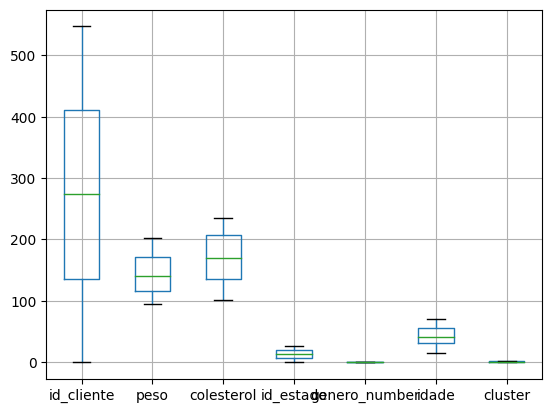

In [ ]:
cluster_clientes.boxplot()
plt.show()

In [ ]:
cluster_clientes.groupby(['nome_cluster'])['genero'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,175,2,Masculino,96
Baixo Risco,167,2,Masculino,96
Risco Moderado,160,2,Feminino,91


In [ ]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,175,25,Distrito Federal,11
Baixo Risco,167,25,Amazonas,13
Risco Moderado,160,25,Mato Grosso do Sul,11


In [ ]:
cluster_clientes.groupby('estado')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
estado,,,,,,,,
Acre,12.0,162.500000,35.186516,105.0,143.00,158.5,185.00,222.0
Alagoas,21.0,174.666667,42.046799,106.0,139.00,181.0,214.00,228.0
Amapá,21.0,169.761905,45.567428,102.0,125.00,167.0,213.00,232.0
Amazonas,25.0,164.880000,45.497546,106.0,126.00,143.0,219.00,232.0
Bahia,18.0,164.444444,38.769640,108.0,130.75,164.0,185.25,226.0
Ceará,25.0,171.400000,40.282337,110.0,134.00,172.0,209.00,231.0
Distrito Federal,22.0,175.954545,42.539032,110.0,133.50,194.0,211.75,231.0
Espírito Santo,18.0,179.111111,38.018399,105.0,165.00,180.0,217.50,227.0
Goiás,23.0,154.086957,28.316255,111.0,131.00,158.0,170.50,232.0


In [ ]:
cluster_clientes.query('nome_cluster == "Baixo Risco" & genero == "Feminino" ')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade,cluster,nome_cluster
157,11,104.0,116,Feminino,3,0,Amapá,ap,Brasil,50,1,Baixo Risco
178,13,96.0,102,Feminino,17,0,Pernambuco,pe,Brasil,52,1,Baixo Risco
158,17,109.0,125,Feminino,3,0,Amapá,ap,Brasil,61,1,Baixo Risco
253,22,107.0,122,Feminino,15,0,Paraíba,pb,Brasil,28,1,Baixo Risco
330,27,108.0,123,Feminino,21,0,Rio Grande do Sul,rs,Brasil,35,1,Baixo Risco
...,...,...,...,...,...,...,...,...,...,...,...,...
250,487,111.0,126,Feminino,5,0,Bahia,ba,Brasil,41,1,Baixo Risco
499,510,110.0,120,Feminino,19,0,Rio de Janeiro,rj,Brasil,48,1,Baixo Risco
456,515,112.0,134,Feminino,9,0,Goiás,go,Brasil,65,1,Baixo Risco
328,521,115.0,137,Feminino,10,0,Maranhão,ma,Brasil,45,1,Baixo Risco


In [ ]:
cluster_clientesfem = cluster_clientes.query('nome_cluster == "Baixo Risco" & genero == "Feminino" ')

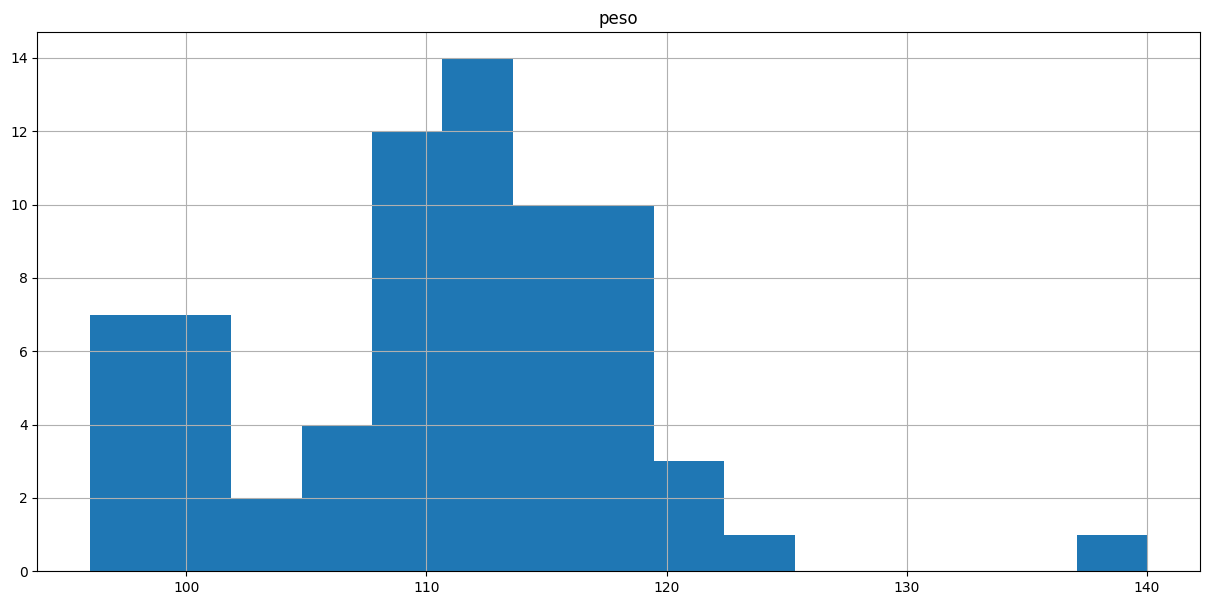

In [ ]:
cluster_clientesfem.hist(column='peso', figsize=(15,7), bins=15)
plt.show()

In [ ]:
cluster_clientesmas = cluster_clientes.query('genero == "Masculino" ')

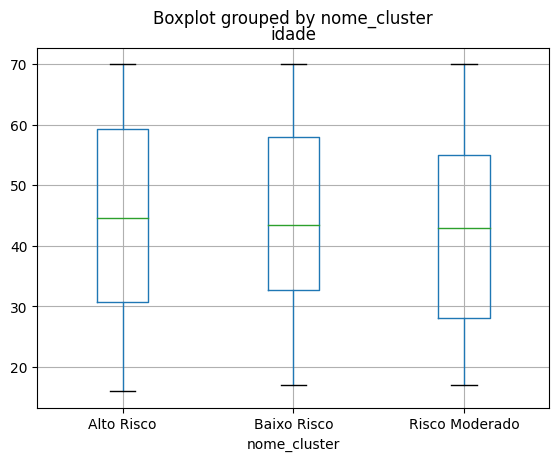

In [ ]:
cluster_clientesmas.boxplot('idade', 'nome_cluster')
plt.show()